In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xml.etree.ElementTree as ET

import task

In [33]:
# r_task = task.SuperTask.from_xml(ET.fromstring(open('example.xml').read()))
r_task = task.load(open('example.xml'))

In [34]:
r_task.sample(10000)

array([18.40545653, 18.44723703, 21.21521295, ..., 19.41348087,
       27.44096955, 15.13405323])

In [35]:
el_root = r_task.to_xml()
ET.indent(el_root, space=' '*4)

print(ET.tostring(el_root).decode())


<super days="7" q25="16" q50="19" q75="22" q90="24">
    <t1 days="5" q25="4" q50="5" q75="7" q90="9" />
    <t2 days="5" q25="9" q50="11" q75="13" q90="15">
        <ch-a days="2" q25="2" q50="2" q75="4" q90="5" />
        <ch-b days="3" q25="2" q50="3" q75="5" q90="6" />
        <ch-c days="4" q25="3" q50="4" q75="6" q90="8" />
    </t2>
</super>


In [25]:
round(4.4)

4

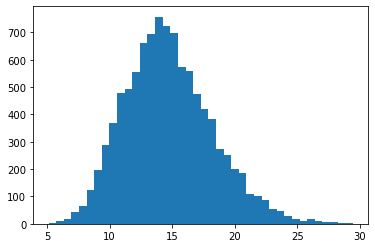

In [16]:
t0 = task.ElementaryTask("t0", days=0)
t1 = task.ElementaryTask("t1", days=5)
t2 = task.ElementaryTask("t2", days=5)

s_task = task.SuperTask("super", days=7, prerequisites=[t1, t2])

plt.hist(s_task.sample(10000), 40);

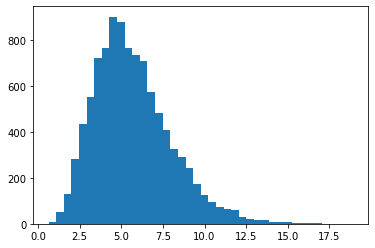

In [65]:
plt.hist(t1.sample(10000), 40);

In [73]:
np.median(t1.sample(10000)), np.median(s_task.sample(10000))

(5.3890590401387914, 14.455237848703039)

In [57]:
s_task._prereq_sample(8)

array([[7.96634612, 5.13590105],
       [4.75696092, 3.46815751],
       [4.2189068 , 5.52012172],
       [2.55908795, 6.9913816 ],
       [8.99840468, 5.56850744],
       [5.57958723, 6.6759718 ],
       [6.0757122 , 6.890024  ],
       [6.68786111, 3.35981708]])

In [114]:
el_root = ET.Element(s_task.name, days=str(s_task.days))
el_t1 = ET.Element(t1.name, days=str(t1.days))
el_t2 = ET.Element(t2.name, days=str(t2.days))

In [115]:
el_root.append(el_t1)
el_root.append(el_t2)

ET.indent(el_root, space='    ')

In [116]:
print(ET.tostring(el_root).decode())

<super days="7">
    <t1 days="5" />
    <t2 days="5" />
</super>


In [102]:
ET.tostring?

In [119]:
el_root.tag

'super'

In [124]:
list(el_root.iter())

[<Element 'super' at 0x7f091fc73360>,
 <Element 't1' at 0x7f091fc728b0>,
 <Element 't2' at 0x7f091fc72090>]

In [125]:
el_root.getchildren()

AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'getchildren'

In [129]:
list(el_root)

[<Element 't1' at 0x7f091fc728b0>, <Element 't2' at 0x7f091fc72090>]

In [131]:
parsed = ET.fromstring(open('example.xml').read())

In [132]:
list(parsed)

[<Element 't1' at 0x7f091fabbb80>, <Element 't2' at 0x7f091fabbbd0>]

In [17]:
np.percentile?